Підготовка данних та реалізація моделі CNN

In [6]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Шляхи до даних
train_dir = r"C:\Users\anton\Downloads\spoon-vs-fork"
test_dir = r"C:\Users\anton\Downloads\spoon-vs-fork_test"

# Параметри
img_height, img_width = 150, 150
batch_size = 32

# Підготовка даних
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)
val_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

# Модель CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Компіляція моделі
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Опис моделі
model.summary()


Found 277 images belonging to 2 classes.


Found 68 images belonging to 2 classes.
Found 345 images belonging to 2 classes.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

Тренування та тестування моделі

c:\Users\anton\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 701ms/step - accuracy: 0.5443 - loss: 0.8458 - val_accuracy: 0.5588 - val_loss: 0.6856
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 636ms/step - accuracy: 0.4769 - loss: 0.6892 - val_accuracy: 0.5588 - val_loss: 0.6862
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 627ms/step - accuracy: 0.5462 - loss: 0.6708 - val_accuracy: 0.5588 - val_loss: 0.6942
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 803ms/step - accuracy: 0.5742 - loss: 0.6378 - val_accuracy: 0.3971 - val_loss: 0.6976
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 952ms/step - accuracy: 0.6102 - loss: 0.6387 - val_accuracy: 0.6471 - val_loss: 0.6871
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 989ms/step - accuracy: 0.6722 - loss: 0.5678 - val_accuracy: 0.6176 - val_loss: 0.6872
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.7091 - loss: 0.5143 - val_accuracy: 0.6618 - val_loss: 0.7001
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7043 - loss: 0.4887 - val_accuracy: 0.6765 - val_loss: 0.6

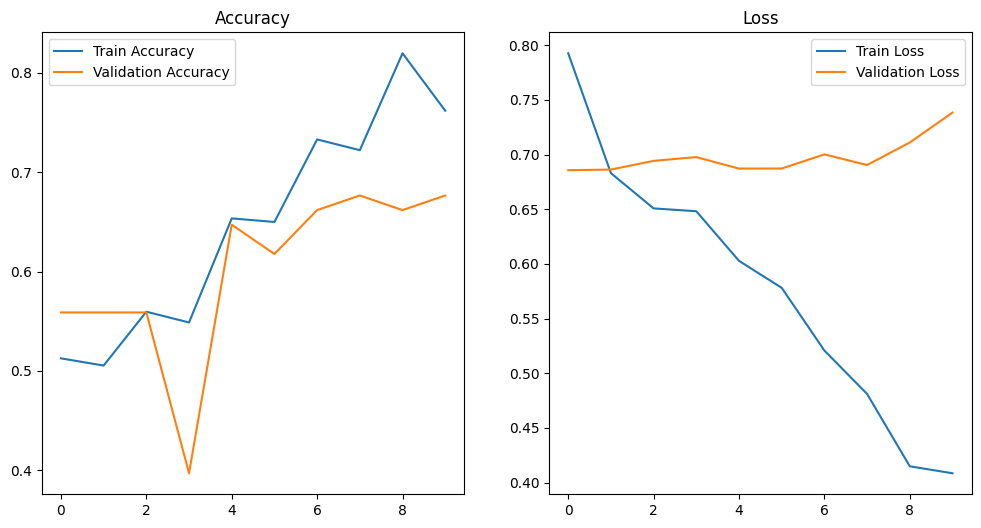

In [7]:
# Навчання моделі
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

# Оцінка на тестових даних
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Точність на тестових даних: {test_accuracy:.2f}")

# Графіки тренування
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()


Оцінка результатів

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Прогнозування на тестових даних
test_data.reset()
predictions = model.predict(test_data)
y_pred = (predictions > 0.5).astype(int)
y_true = test_data.classes

# Звіт
print(classification_report(y_true, y_pred, target_names=test_data.class_indices.keys()))

# Матриця плутанини
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 306ms/step
              precision    recall  f1-score   support

        fork       0.58      0.73      0.64       194
       spoon       0.47      0.31      0.37       151

    accuracy                           0.54       345
   macro avg       0.52      0.52      0.51       345
weighted avg       0.53      0.54      0.53       345

Confusion Matrix:
 [[141  53]
 [104  47]]


Візуалізація та перевірка передбачень моделі

Shape of first image: (150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


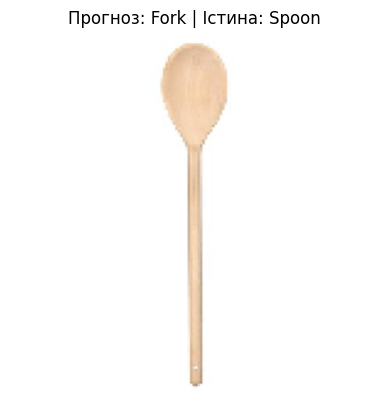

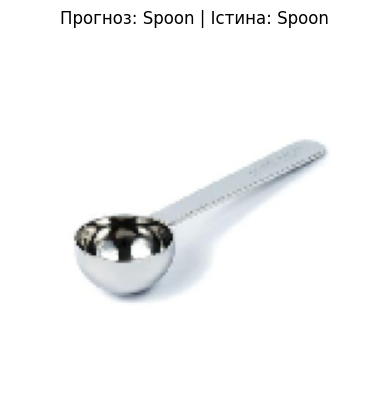

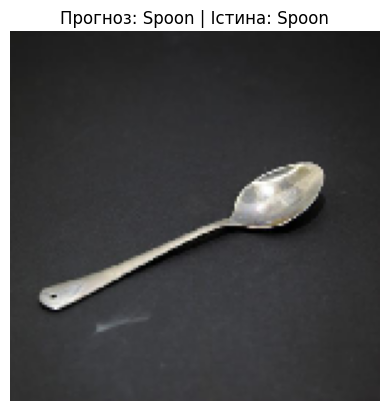

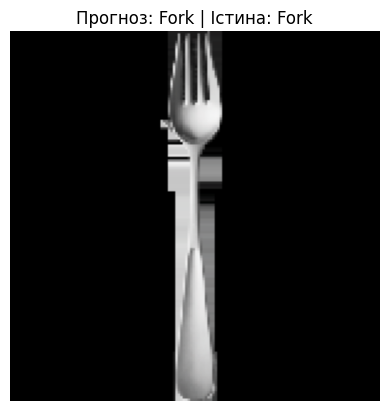

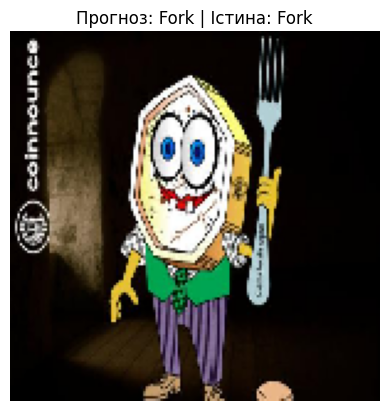

In [12]:
import matplotlib.pyplot as plt

# Створюємо ітератор для тестових даних
test_iterator = iter(test_data)

# Отримуємо одну партію з тестових даних
images, labels = next(test_iterator)

# Перевіримо, чи всі зображення мають правильну розмірність
print(f"Shape of first image: {images[0].shape}")

# Виконуємо передбачення
predictions = model.predict(images)

# Виводимо перші 5 зображень з підписами
for i in range(5):
    # Візуалізація зображення
    plt.imshow(images[i])  # В `images` вже масштабовані дані
    plt.axis("off")
    
    # Інтерпретація прогнозів
    pred_label = "Fork" if predictions[i] < 0.5 else "Spoon"
    
    # Фактична категорія
    true_label = "Fork" if labels[i] == 0 else "Spoon"

    # Виведення результату
    plt.title(f"Прогноз: {pred_label} | Істина: {true_label}")
    plt.show()
